In [1]:
import pandas as pd 
from langchain_groq.chat_models import ChatGroq
import numpy as np


In [2]:
Groq_Token = 'Enter API key here'  # Do not share this key with anyone


groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [34]:
from MakeDataset import X_train,X_test,y_train,y_test
array_string_list = []
res_list = []
for i in range(len(X_train)):

    array_2d = X_train[i]
    array_string = np.array2string(array_2d, separator=', ')
    array_string_list.append(array_string)
    res_list.append(y_train[i])



In [6]:
y_train[0]

2

In [25]:
for i in range(50):
    query = f"""
    * You are an activity classification model. 
    * Your task is to analyze a string array which will be provided to you as a string and have acceleration values in the x, y and z directions and you have to classify the activity value as "WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING". 
    * Provide the activity label ONLY
    
    Csv_string: {array_string_list[i]}
    """ 
    
    # To use Groq LLMs 
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=1)
    answer = llm.invoke(query)
    print(f'Correct Answer was {y_train[i]}')

    print(answer.content)

Correct Answer was 2
WALKING
Correct Answer was 6
WALKING
Correct Answer was 5
WALKING
Correct Answer was 2
WALKING_UPSTAIRS
Correct Answer was 2
WALKING
Correct Answer was 2
WALKING
Correct Answer was 1
WALKING
Correct Answer was 1
WALKING_UPSTAIRS
Correct Answer was 5
WALKING
Correct Answer was 4
WALKING
Correct Answer was 1
WALKING
Correct Answer was 4
WALKING
Correct Answer was 1
WALKING
Correct Answer was 1
WALKING
Correct Answer was 6
WALKING
Correct Answer was 2
WALKING
Correct Answer was 3
WALKING
Correct Answer was 1
WALKING_UPSTAIRS
Correct Answer was 1
WALKING
Correct Answer was 4
WALKING
Correct Answer was 3
WALKING
Correct Answer was 3
WALKING
Correct Answer was 5
WALKING
Correct Answer was 6
WALKING
Correct Answer was 5
WALKING
Correct Answer was 1
WALKING
Correct Answer was 3
WALKING
Correct Answer was 6
WALKING_UPSTAIRS
Correct Answer was 4
WALKING
Correct Answer was 5
WALKING
Correct Answer was 5
WALKING
Correct Answer was 2
WALKING
Correct Answer was 5
WALKING
Correct

KeyboardInterrupt: 

In [35]:
data_seven_activities = []
for i in range(100):
    data_seven_activities.append(array_string[i]+' : ' + str(y_train[0]))
activities_string = ' '.join(data_seven_activities)

In [39]:
res = 0
for i in range(10,20):

    
    query = f"""
    * You are an activity classification model. 
    * You will be provided with data of seven activities in string format as a two dimensional array followed by its correct classification
    * how to classify the data from the above examples
    * Your task is to analyze a string array which will be provided to you as a string and have acceleration values in the x, y and z directions and you have to classify the activity value as 1,2,3,4,5 or 6 from what you learned above. 
    * Provide the activity label number ONLY
    
    data_seven_activities: {activities_string}
    string to classify: {array_string_list[i]}
    """ 
    
    # To use Groq LLMs 
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=1)
    answer = llm.invoke(query)
    print(f'Correct Answer was {y_train[i]}')
    print(answer.content)
    if int(answer.content) == y_train[i]:
        res += 1
print(res/10)



Correct Answer was 1
4
Correct Answer was 4
3
Correct Answer was 1
3
Correct Answer was 1
3
Correct Answer was 6
4
Correct Answer was 2
2
Correct Answer was 3
6
Correct Answer was 1
2
Correct Answer was 1
2
Correct Answer was 4
3
0.1


In [49]:
from Task1.ipynb import df
print(df)

ModuleNotFoundError: No module named 'Task1'

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


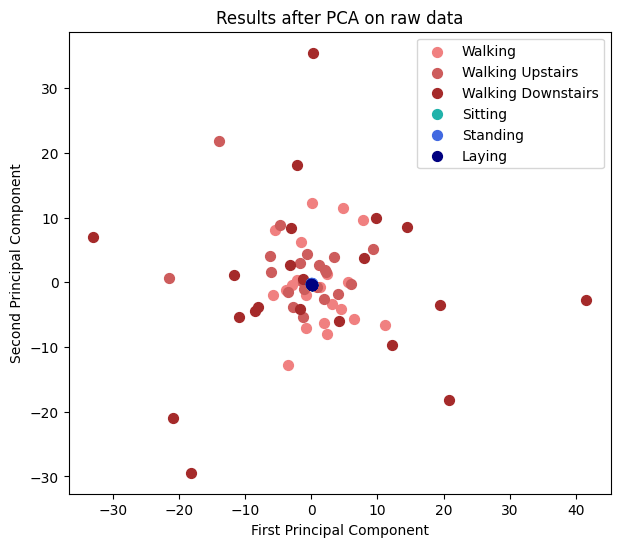

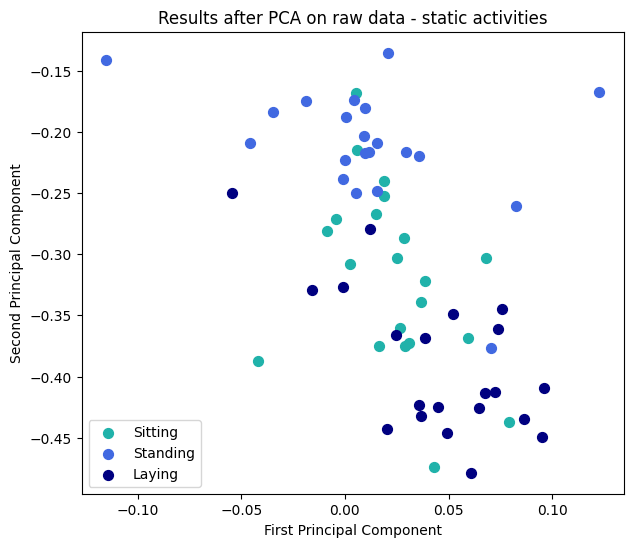

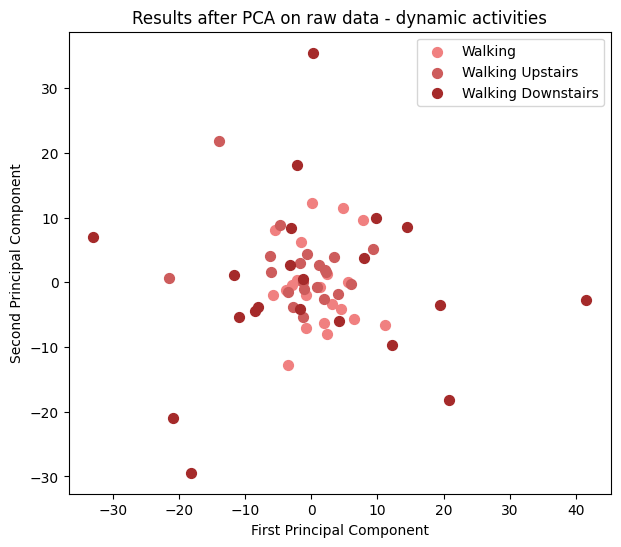

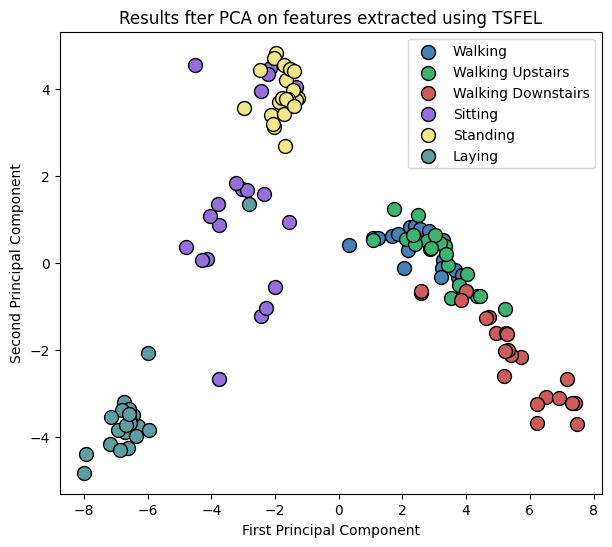

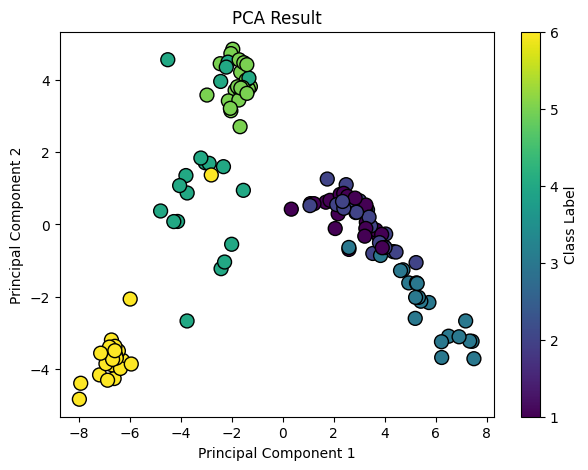

         accx      accy      accz
100  1.479893 -0.478350 -0.134832
101  1.417838 -0.526430 -0.024020
102  1.126610 -0.446849 -0.057620
103  0.721768 -0.365883 -0.116355
104  0.642694 -0.352915 -0.153205


In [55]:
# Target notebook (target_notebook.ipynb)
import nbformat
import tsfel
# Run the source notebook to import the DataFrame
%run Task1.ipynb

# Now, you can use the DataFrame defined in the source notebook
print(df.head())


In [77]:
csv_tsfel_train = tsfel_pca[:100].to_csv()
csv_tsfel_test = tsfel_pca[['pca1', 'pca2']][100:126].to_csv()
print(csv_tsfel_test)

,pca1,pca2
100,3.7908949337194247,-0.5024270847857406
101,-1.6493508198123095,3.7662146202624314
102,2.5378717664418473,0.7753360080192747
103,2.835060563837388,0.7275204473420078
104,3.2552474168873435,-0.10966841203374386
105,5.208417118856695,-2.0128891967970906
106,-2.2208502097561733,4.343991152674106
107,-1.4099693567191693,3.6194651426758533
108,-6.803762258505558,-3.3845588292473763
109,3.2138871736184695,-0.32311470993705715
110,5.270616151330657,-1.6289726161181102
111,-5.948332295092695,-3.8525858220262093
112,-1.4142135499523745,4.4109808802251305
113,-3.758838503506393,-2.6642488797261685
114,2.890180515259918,0.3375359643090977
115,4.440799808622789,-0.7617414921252758
116,-6.681149725450099,-3.7264665062911937
117,4.008660755913274,-0.6371103612739265
118,-5.990759233639031,-2.05957381793541
119,-6.592445796199557,-3.4847285549541023
120,2.590356528595458,-0.6346625424145872
121,3.9008009503720036,-0.6425662384888255
122,-4.515600086367743,4.547864039519446
123,-7.149338

In [79]:
query = f"""
* You are an activity classification model. 
* You will be provided with training string of csv format of 100 sample rows, PCA1 and PCA2 as feature columns and class is the target value for each row
* learn a decision tree model from this data and use it to predict class for every row of another csv string named test string
* Provide the activity label number ONLY on a single line for each of the test line 
* Test string only has 26 rows. So provide only 26 lines of output

training data: {csv_tsfel_train}
string to classify: {csv_tsfel_test}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=1)
answer = llm.invoke(query)
print(f'Correct Answer was {y_train[100:126]}')
print(answer.content)

Correct Answer was [2 5 1 1 1 3 4 5 6 1 3 6 5 4 2 2 6 2 6 6 3 1 4 6 2 2]
I'll learn a decision tree model from the training data and use it to predict the class for each row of the test data. Here are the predicted class labels for each row of the test data:

1
5
2
2
2
3
5
5
6
1
4
5
4
6
3
5
4
5
4
6
3
3
3
3
3
1
